# Import the necessary packages.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib as mpl
import math

In [2]:
from matplotlib import font_manager

font_path = 'C:\Windows\Fonts\SEGOEUI.TTF'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = prop.get_name()

In [3]:
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [4]:
# import matplotlib.font_manager
# from IPython.core.display import HTML

# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [5]:
mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = ['Lucida Grande'] # ['Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.stretch'] = 'extra-condensed'
### CAN WE IMPORT CUSTOM FONTS
### EXPORT SVG
### REDUCE FONT SIZE

# Project Information

In [6]:
# Blank

# Import and check the data

In [7]:
# Energy consumption 
Baseline = [  131490,                   141255.8,                 137310,             794833,     865554.58,  176627]
Design = [    131490,                   106740.3,                 59175,              216054,     169969.9,   132103]
end_uses = [  "Receptacle equipment",   "Service water heating",  "Pumps and Fans",   "Cooling",  "Heating",  "Lighting"]

In [8]:
# df = pd.read_csv("B246EndUses.csv",index_col="End Use")
df = pd.DataFrame(
    list(zip(Baseline, Design)),
    index= end_uses,
    columns = ["LEED v4 Baseline", "Design"])

In [9]:
# Convert kWh to kBtu
df = df * 3.412141

# Convert to EUI
area = 68876.49 # ft2
df = df / area



In [10]:
# Format and view dataframe
df = df.T
# df = df.drop("Total Energy Use Intensity", axis=1)
columns = df.columns.tolist()
# columns = columns[::-1]
df = df[columns]
df.head()

,Receptacle equipment,Service water heating,Pumps and Fans,Cooling,Heating,Lighting
LEED v4 Baseline,6.514014,6.997812,6.802337,39.376023,42.879570,8.750101
EYP's Design,6.514014,5.287914,2.931529,10.703314,8.420308,6.544382


# Graphical Standards

In [11]:
# Create hex colors for each patch and create Legend labels
color_lighting = "#e6c845"
color_heating = "#f26127"
color_cooling ="#1e4e71"
color_pumps_and_fans = "#906ca6"
color_service_water_heating = "#1a998a"
color_receptacle_equipment = "#38424d"
color_map = [color_receptacle_equipment,color_service_water_heating,color_pumps_and_fans,color_cooling,color_heating,color_lighting]
legendLabels = ['Receptacle Equipment','Service Water Heating','Pumps and Fans','Cooling','Heating','Lighting']

# Calculate Total by ECM

# Filter data for Meter 1 and create plot

In [12]:
totalDF = df.sum(axis=1)
print(totalDF)

LEED v4 Baseline    111.319856
EYP's Design         40.401461
dtype: float64


## Create Energy Conservation Measure Stacked Bar Chart

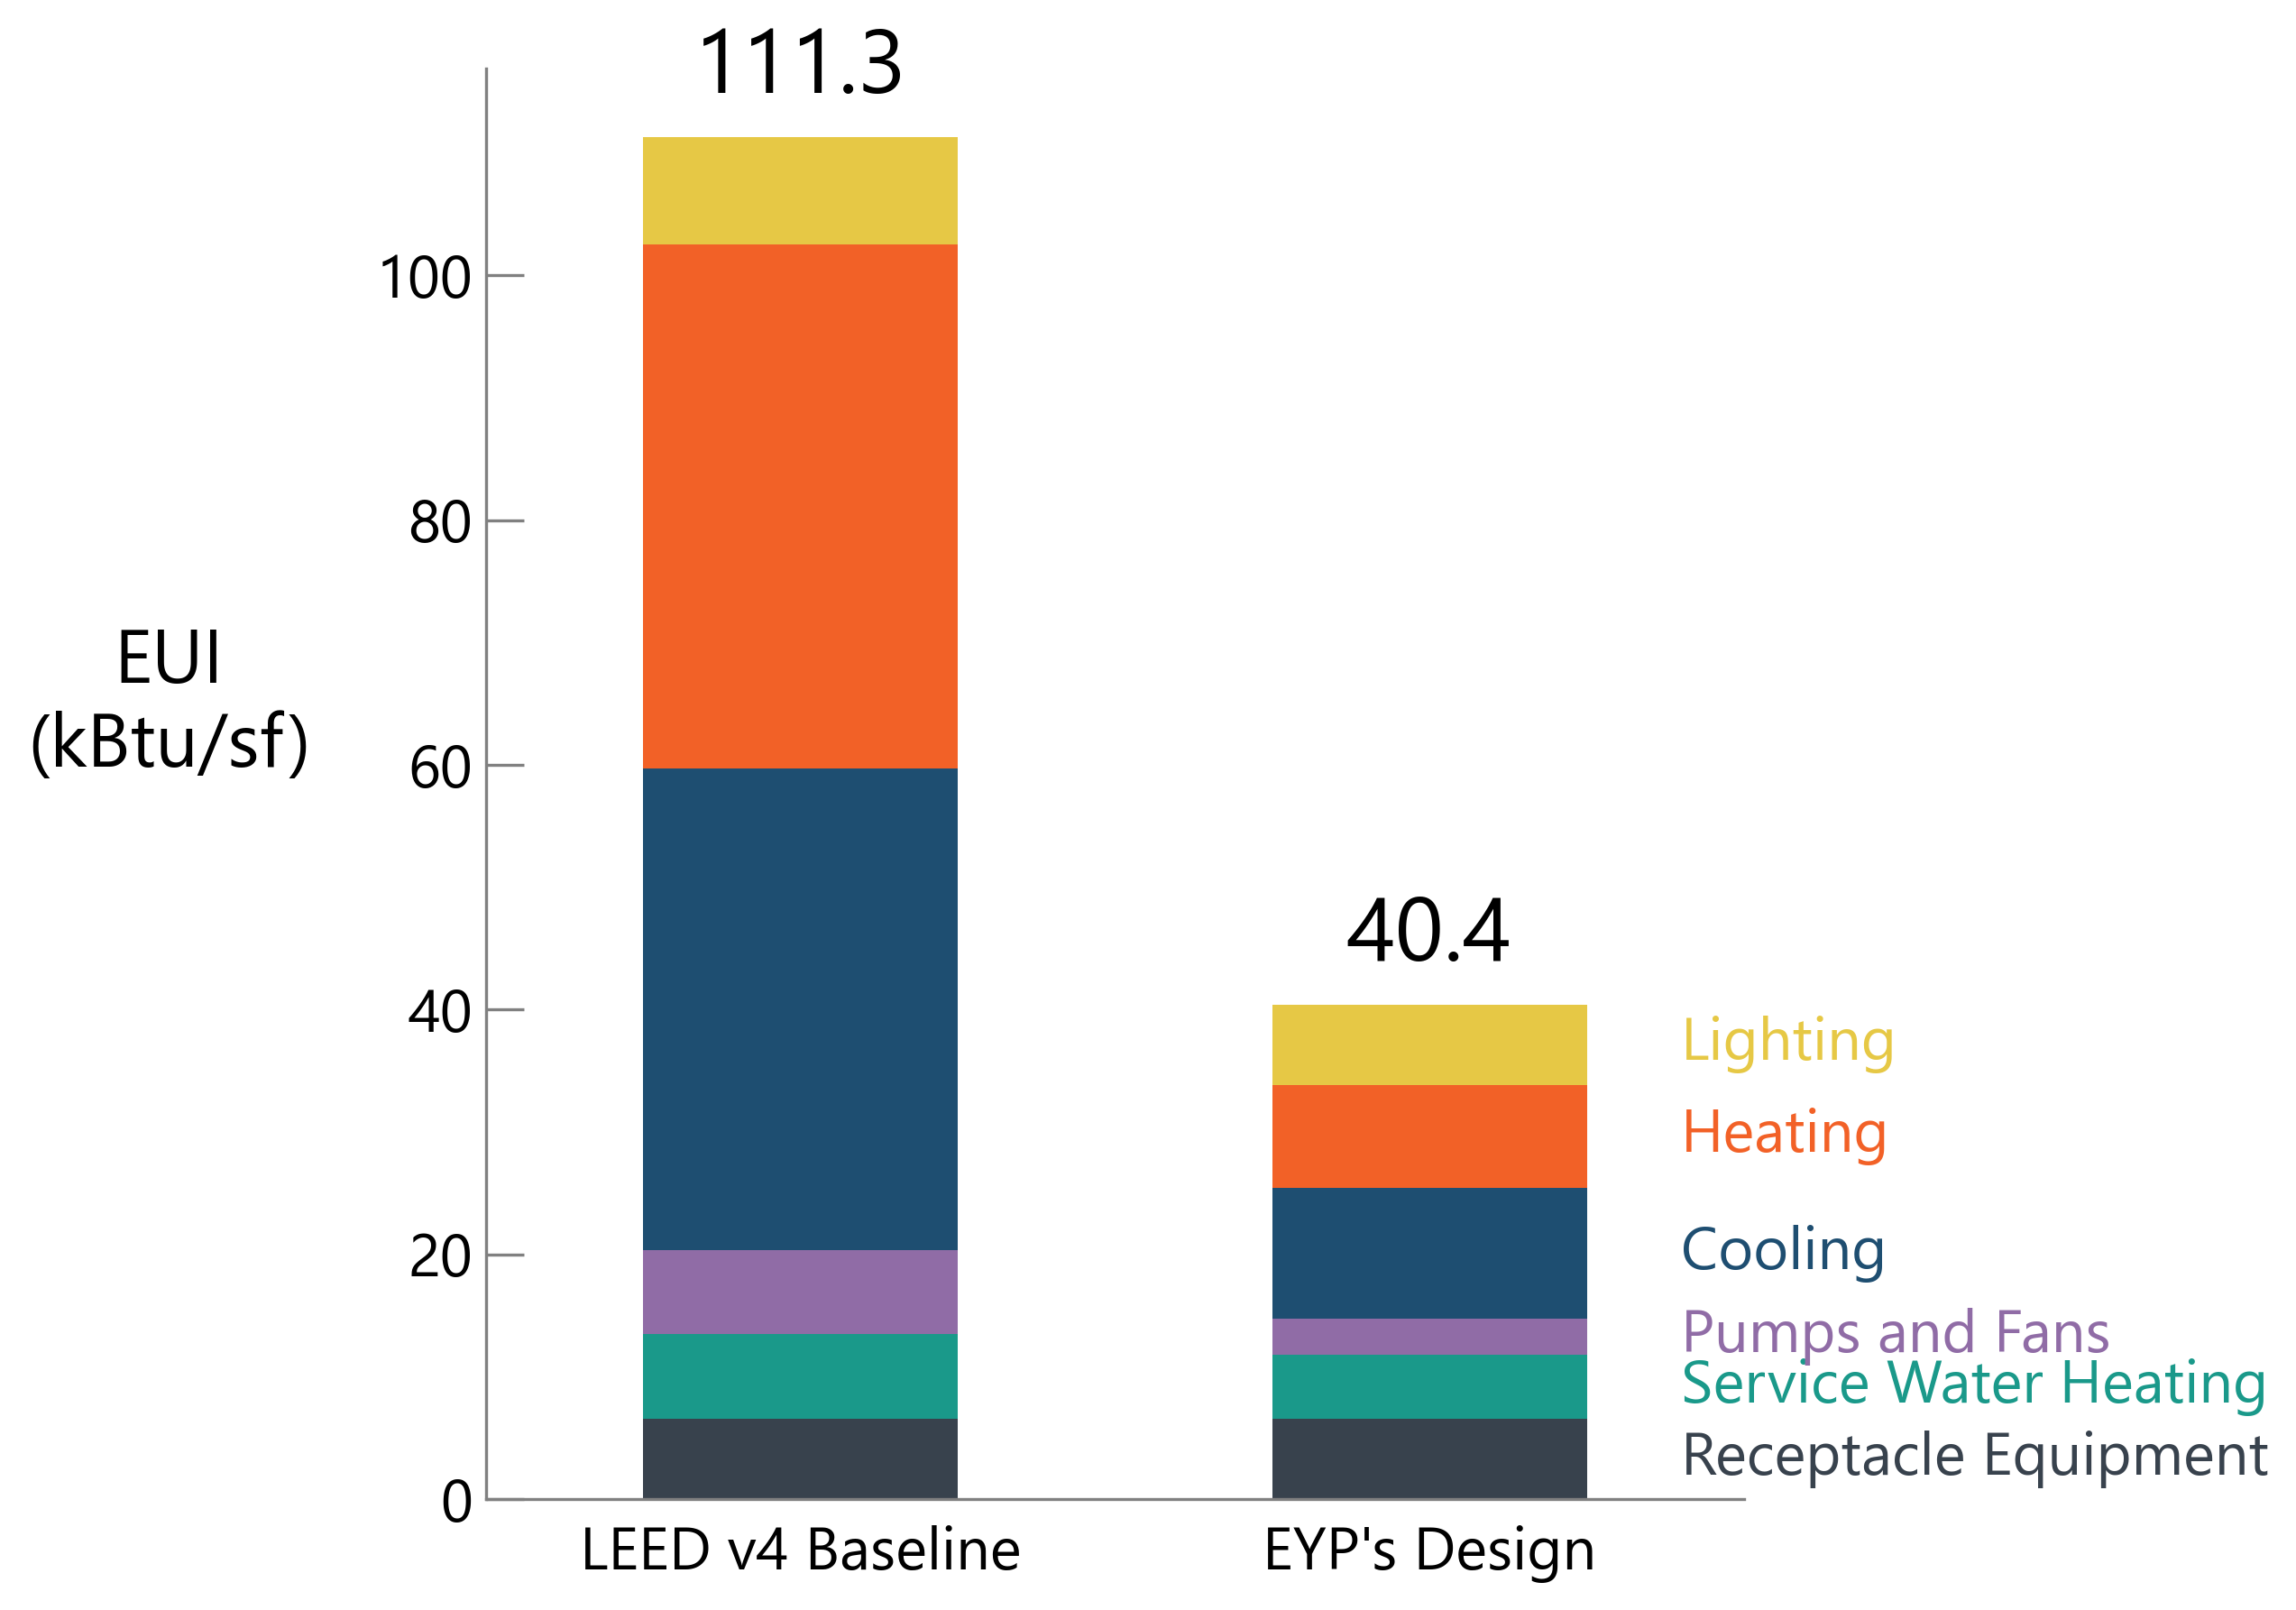

In [13]:
### Create the plot ###
ax = df.plot.bar(stacked=True, color=color_map, figsize=(6,7), rot=0, fontsize=16)
#### DECREASE TEXT SIZE

### Edit the plot characteristics ###
#ax.set_xlabel('Energy Conservation Measures',fontsize=14)
#ax.set_title('Chancery* Annual Energy Consumption of Energy Conservation Measures (w/o Plug Loads)',fontsize=14)
#ax.set_xticklabels(rotation=45)
ax.set_ylabel('EUI\n(kBtu/sf)',fontsize=20, rotation=0, labelpad=55)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start,end,20))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='y',direction='in',color='gray', length=10)
ax.tick_params(axis='x',bottom=False)

### Legends Parameters ###
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], legendLabels[::-1], loc='center left', bbox_to_anchor=(1,0.19), title='End Uses')
ax.get_legend().remove()


### Add labels -- .patches are everything inside of the chart ###
maxHeight = df.iloc[0:1].sum().sum()
for count, rect in enumerate(ax.patches):
  #print(count, rect)

  ### Find where each patch is located ###
  height = rect.get_height()
  width = rect.get_width()
  x = rect.get_x()
  y = rect.get_y()
  
  ### The height of the bar is the data value and can be used as the label ###
  #heightPercentage = height/maxHeight * 100
  #label_text = f'{heightPercentage:.1f}%'  #f'{height:.2f}' to format decimal values
  EUI_text = totalDF[count%len(totalDF)] #EUI Value
  total_text = f'{EUI_text:.1f}' # $kBtu/ft^2$' #EUI display text
  
  ### Find center of patch to place text ###
  label_x = x + width / 2
  label_y = y + height / 2
  label_y_full = y + height + 6

  #  ax.text(label_x, label_y, label_text, ha='center', va='center', color="white",fontsize=10)
  
  ### Place the EUI above the top patch ###
  if label_y_full > totalDF[count % len(totalDF)]:
    # print(label_y_full, totalDF[count % len(totalDF)], total_text)
    ax.text(label_x, label_y_full+3, total_text, ha="center", va='top', color='black', fontsize=24, fontweight='normal')
  
  ### Place the names to the right of the EYP's Design bar ###
  if x > 0:
    ax.text(label_x+0.4, label_y, legendLabels[math.floor(count/2)], ha='left', va='center', fontsize=16, color=color_map[math.floor(count/2)])